Projeto Final de Inteligência Artificial

Categorização de emoções em texto usando Processamento de Linguagem Natural (PLN)

Gabriel de Mello Cambuy Ferreira, RA: 142641
Nicole Cristine de Faria Santos, RA: 156636

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
# data processing
import pandas as pd
from sklearn.svm import SVC
from textblob import TextBlob

# **1. DataBase - Base de dados do Twitter**

**1. Exploração da Base de Dados**

In [ ]:
dataset_MG = '/content/drive/MyDrive/TwitterAnalytics/Tweets_Mg.csv'

In [ ]:
dataset = pd.read_csv(dataset_MG, encoding='utf-8')

In [ ]:
# Ler o arquivo .csv
dataset = pd.read_csv(dataset_MG, encoding='utf-8')
dataset.count()
#Após a leitura do dataset é possível ver a quantidade de linhas e a quantidade de valores não nulos em cada uma das 26 colunas para iniciar a exploração da base de dados

,0
Unnamed: 0,8199
Created At,8199
Text,8199
Geo Coordinates.latitude,104
Geo Coordinates.longitude,104
User Location,5489
Username,8199
User Screen Name,8199
Retweet Count,8199
Classificacao,8199


In [ ]:
dataset.head()
#O comando .head possibilita ver as 5 primeiras linhas e observar questões como: possível uso de emojis gerando caracteres �, ausência de coordenadas e location para alguns posts e colunas vazias

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.info()
#O comando .info mostra o nome da coluna, nome, quantidade de não nulos e tipo.
#Podemos ver que o dataset contém um total 15 colunas, valores vazios na coluna de User Location e as colunas de coordenadas estão praticamente vazias considerando o tamanho do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

**2. Limpeza dos dados**

In [ ]:
# Remove os valores duplicados, uma vez que o mesmo usuário pode digitar várias vezes o mesmo tweet ou o dataset pode estar duplicado

dataset.drop_duplicates(['Text'], inplace=True)

# Remove as colunas vazias do dataset
colunas_vazias = [f'Unnamed: {i}' for i in range(10, 25)]
dataset = dataset.drop(colunas_vazias, axis=1)

dataset = dataset.drop(['Observação'], axis=1)

dataset.shape
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [ ]:
import re

def Clear_Tweets(instancia):
    # Remove links, hashtags, e marcações de usuários
    instancia = re.sub(r"http\S+", "", instancia)  # Remove links
    instancia = re.sub(r"#\S+", "", instancia)     # Remove hashtags
    instancia = re.sub(r"@\S+", "", instancia)     # Remove marcações de usuários
    instancia = instancia.lower()  # Converte para minúsculas
    instancia = instancia.replace('.', '')  # Remove pontos
    instancia = instancia.replace(';', '')  # Remove ponto e vírgula
    instancia = instancia.replace('-', '')  # Remove hífen
    instancia = instancia.replace(':', '')  # Remove dois-pontos
    instancia = instancia.replace(')', '')  # Remove parênteses fechados
    instancia = instancia.replace('�', '')  # Remove emojis
    return instancia

# Aplicar a função Clear_Tweets somente na coluna 'Text'
dataset['Text'] = dataset['Text'].apply(Clear_Tweets)

# Exibir os resultados
print(dataset['Text'].head(50))


0     ⛪ @ catedral de santo antônio  governador vala...
1                 @ governador valadares, minas gerais 
2                 @ governador valadares, minas gerais 
3                                                      
4      psol vai questionar aumento de vereadores e p...
5     " bom é bandido morto"\ndeputado cabo júlio é ...
6     "e 25% dos mineiros dizem não torcer para time...
7     "a gigantesca barba do mal" em destaque no cad...
8     "bb e governo de minas travam disputa sobre de...
9     "com vcs bh fica pequena!" belo horizonte (pro...
10    "daí a gente visita governador valadares"\n"qu...
11    "é bonita e é bonita" \n   @ governador valada...
12    "erro desconhecido" é mato! aliás, é da secret...
13    "la la land cantando estações" arrasa no globo...
14    "la la land cantando estações" arrasa no globo...
15    "los abusos, aun en el estado más sólido, son ...
16    "mesmo sem muito dinheiro no caixa o governo d...
17    "modelo de segurança será o nosso legado",

**3. Formatação dos Dados para utilização pelo algoritmo de aprendizagem**

In [ ]:
dataset.Text

,Text
0,⛪ @ catedral de santo antônio governador vala...
1,"@ governador valadares, minas gerais"
2,"@ governador valadares, minas gerais"
3,
4,psol vai questionar aumento de vereadores e p...
...,...
8194,"trio é preso suspeito de roubo, tráfico e abus..."
8195,"trio é preso suspeito de roubo, tráfico e abus..."
8196,"trio é preso suspeito de roubo, tráfico e abus..."
8197,"trio é preso suspeito de roubo, tráfico e abus..."


**4. Separar a base em treino (80%) e teste (20%)**

In [ ]:
#Separação das classes pré-definidas na base de dados

tweets = dataset['Text'].values
classes = dataset['Classificacao'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em 80% treino e 20% teste
tweets_train, tweets_test, classes_train, classes_test = train_test_split(tweets, classes, test_size=0.2, random_state=42)

# Exibir os resultados
print("Treino:")
print(tweets_train)
print("\nTeste:")
print(tweets_test)

Treino:
['polícia civil identifica suspeito de roubo a ônibus em juiz de fora  '
 'pm apreende maconha e celular em presídio de coronel fabriciano, mg  '
 'new post "cinco homens são presos suspeitos de tráfico de drogas em pirapora" '
 ...
 'suspeitos de envolvimento em roubo de bancos no sul de mg são presos '
 '  são lourenço \x96 adolescente é apreendido por tráfico de drogas '
 'e governo ainda quer indenizar a família dos bandidos?    ']

Teste:
['com três anos, presídio privado em minas gerais não teve rebeliões  via '
 'após roubo em distrito de rio vermelho equipe policial da região prende autores de serra azul de minas\n\nno dia 24 '
 'rota 2014  blog do josé tomaz bb avisa justiça que governo de mg desgovernado pe '
 ... 'com três anos, presídio privado em minas gerais não teve rebeliões '
 'homem é preso após transportar drogas em ônibus de turismo, em mg  '
 'alta do pib deste ano segue em 0,50%, afirma focus  estado de minas ']


**5. Executar o treinamento e validação do modelo escolhido**

Para executar a análise de sentimentos, o modelo escolhido será um modelo de aprendizado supervisionado, com base em uma classificação probabilística: **O algoritmo de Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split


# Vetorização
vectorizer = CountVectorizer(analyzer="word")
freq_tweets_train = vectorizer.fit_transform(tweets_train) # Treina o vetor com tweets de treino

# Treinamento do modelo
modelo = MultinomialNB()
modelo.fit(freq_tweets_train, classes_train)

# Transformação dos tweets de teste para a frequência de palavras
freq_testes = vectorizer.transform(tweets_test)

# Previsão dos tweets de teste
predicoes = modelo.predict(freq_testes)

# Cálculo da matriz de confusão
matriz_confusao = metrics.confusion_matrix(classes_test, predicoes)
print("Matriz de Confusão:\n", matriz_confusao)

# Exibir exemplos de tweets mal classificados
erros = tweets_test[predicoes != classes_test]
classes_corretas = classes_test[predicoes != classes_test]
predicoes_erradas = predicoes[predicoes != classes_test]

# Criar um DataFrame para melhor visualização
df_erros = pd.DataFrame({'Tweet': erros, 'Classe Correta': classes_corretas, 'Classe Prevista': predicoes_erradas})

# Exibir todos os erros
print("\nExemplos de Tweets Mal Classificados:")
print(df_erros)

# Contar o número total de erros
total_erros = df_erros.shape[0]
print(f"\nTotal de Tweets Mal Classificados: {total_erros}")



Matriz de Confusão:
 [[182  16   1]
 [ 26 353  14]
 [  7  17 537]]

Exemplos de Tweets Mal Classificados:
                                                Tweet Classe Correta  \
0   umeis de belo horizonte abrem 1,29 mil vagas  ...         Neutro   
1   rt  ativistas voltam às ruas de bh contra aume...       Negativo   
2   rt  antes que apareçam desinformados me pergun...         Neutro   
3                  nova campanha do governo de minas          Neutro   
4   corregedoria geral  ministério público de mina...       Positivo   
..                                                ...            ...   
76  rt  governo de minas dá respostas à justiça so...         Neutro   
77                              petista pimentel\n\n          Neutro   
78  rt  prefeito de ribeirão das neves decreta est...         Neutro   
79  ele mostra como o presídio de ribeirão das nev...       Positivo   
80  enquanto o psdb tira ônibus escolares de são p...       Positivo   

   Classe Prevista  
0       

**Cálculo da acurácia com divisão em treino e teste**

In [ ]:
# Cálculo da acurácia
acuracia_TrainTest = metrics.accuracy_score(classes_test, predicoes)
print("Acurácia:", acuracia_TrainTest)

Acurácia: 0.9297484822202949


**Gráfico quantidade de erros de classificação por classe**

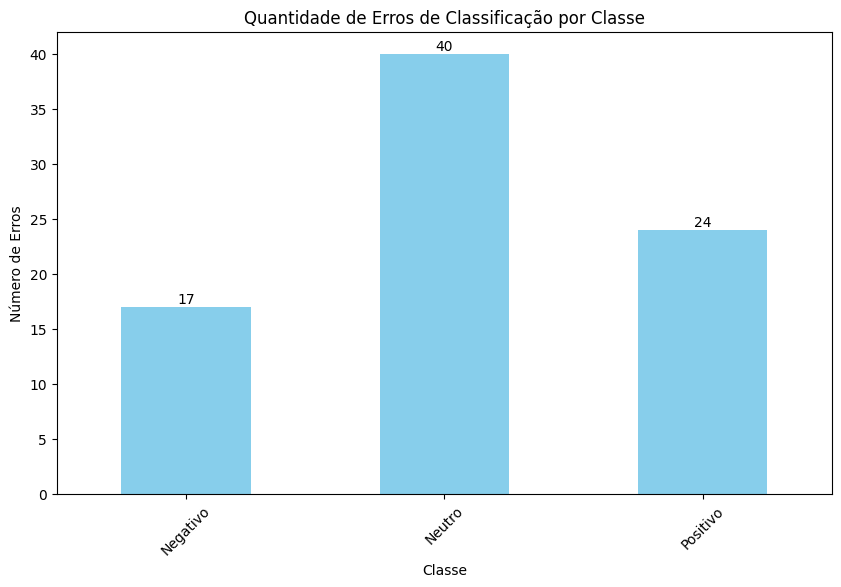

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar o número de erros por classe
erros_por_classe = df_erros.groupby('Classe Correta').size()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = erros_por_classe.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Erros de Classificação por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Erros')
plt.xticks(rotation=45)

# Adicionar rótulos aos dados das barras
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')

plt.show()

**Modelagem com K-Folds**

Matriz de Confusão:
 [[2719   19  102]
 [   5  857   89]
 [  75  121 1778]]

Exemplos de Tweets Mal Classificados:
                                                  Tweet Classe Correta  \
3                                                               Neutro   
20    "o governo de minas gerais não comentou o assu...         Neutro   
24    "representando mais uma ferramenta de monitora...         Neutro   
25    "uso de aeronave pertencente ao  estado de mg,...       Negativo   
27    \n\no governador fernando pimentel, depois de ...         Neutro   
...                                                 ...            ...   
4645  governador de minas gerais\npimentel e kalil s...       Positivo   
4656  mil agentes de segurança penitenciários, aprov...       Positivo   
4946  rt  o sucesso do presídio em sistema ppp const...       Positivo   
5106  minas que se creen piolas por pegarle a otra m...       Positivo   
5488  excaseiro é trazido de minas para o df e confe...       Positivo 

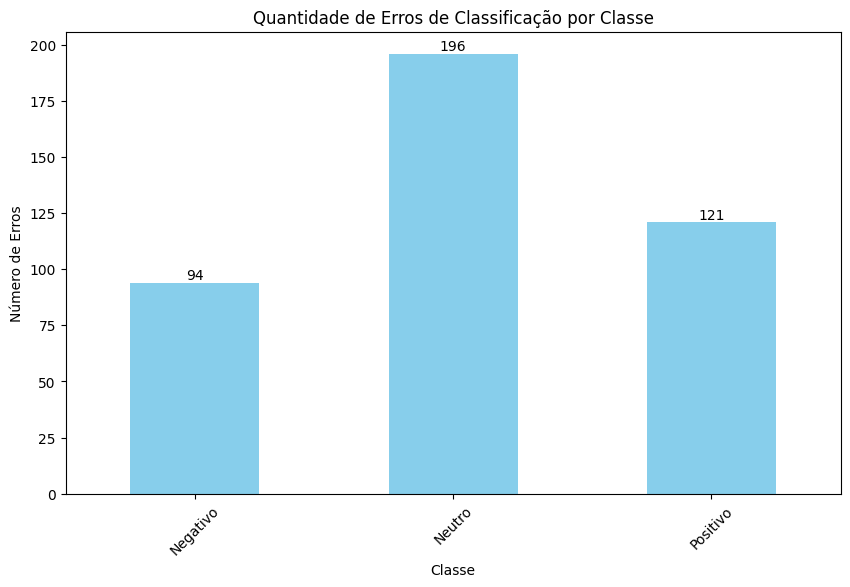

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import make_pipeline

# Separação das classes e tweets
tweets = dataset['Text'].values
classes = dataset['Classificacao'].values

# Criar o pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer="word"),
    MultinomialNB()
)

# Definir o número de folds para a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Previsões com cross-validation
predicoes = cross_val_predict(pipeline, tweets, classes, cv=kf, method='predict')

# Cálculo da matriz de confusão
matriz_confusao = metrics.confusion_matrix(classes, predicoes, labels=['Positivo', 'Negativo', 'Neutro'])
print("Matriz de Confusão:\n", matriz_confusao)

# Criar DataFrame para análise dos erros
# Note que, com cross-validation, não temos uma divisão explícita entre treino e teste,
# então usaremos os dados completos para identificar os erros
df_erros = pd.DataFrame({'Tweet': tweets, 'Classe Correta': classes, 'Classe Prevista': predicoes})

# Exibir exemplos de tweets mal classificados
erros = df_erros[df_erros['Classe Correta'] != df_erros['Classe Prevista']]
print("\nExemplos de Tweets Mal Classificados:")
print(erros)

# Contar o número total de erros
total_erros = erros.shape[0]
print(f"\nTotal de Tweets Mal Classificados: {total_erros}")

# Contar o número de erros por classe
erros_por_classe = erros.groupby('Classe Correta').size()

# Plotar o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = erros_por_classe.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Erros de Classificação por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Erros')
plt.xticks(rotation=45)

# Adicionar rótulos aos dados das barras
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')

plt.show()


In [ ]:
# Cálculo da acurácia
acuracia = metrics.accuracy_score(classes, predicoes)
print(f"Acurácia do modelo: {acuracia:.8f}")

Acurácia do modelo: 0.92870772


**Usando Regressão Logística:**

Matriz de Confusão:
 [[2762    7   71]
 [   8  848   95]
 [  33   64 1877]]

Exemplos de Tweets Mal Classificados:
                                                  Tweet Classe Correta  \
5     " bom é bandido morto"\ndeputado cabo júlio é ...         Neutro   
20    "o governo de minas gerais não comentou o assu...         Neutro   
24    "representando mais uma ferramenta de monitora...         Neutro   
25    "uso de aeronave pertencente ao  estado de mg,...       Negativo   
27    \n\no governador fernando pimentel, depois de ...         Neutro   
...                                                 ...            ...   
3906     crise carcerária rj monitora aproximação do...       Positivo   
4150  força nacional chega a manaus para reforço na ...       Positivo   
5106  minas que se creen piolas por pegarle a otra m...       Positivo   
5237    agentes de presídios do centrooeste de minas...       Positivo   
5488  excaseiro é trazido de minas para o df e confe...       Positivo 

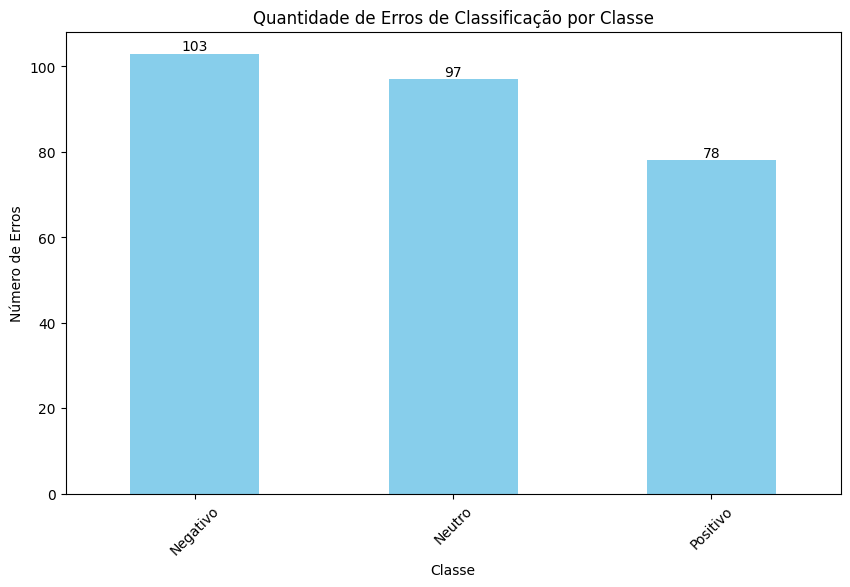

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import make_pipeline

# Separação das classes e tweets
tweets = dataset['Text'].values
classes = dataset['Classificacao'].values

# Criar o pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer="word"),
    LogisticRegression(max_iter=1000)
)

# Definir o número de folds para a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Previsões com cross-validation
predicoes = cross_val_predict(pipeline, tweets, classes, cv=kf, method='predict')

# Cálculo da matriz de confusão
matriz_confusao = metrics.confusion_matrix(classes, predicoes, labels=['Positivo', 'Negativo', 'Neutro'])
print("Matriz de Confusão:\n", matriz_confusao)

# Criar DataFrame para análise dos erros
df_erros = pd.DataFrame({'Tweet': tweets, 'Classe Correta': classes, 'Classe Prevista': predicoes})

# Exibir exemplos de tweets mal classificados
erros = df_erros[df_erros['Classe Correta'] != df_erros['Classe Prevista']]
print("\nExemplos de Tweets Mal Classificados:")
print(erros)

# Contar o número total de erros
total_erros = erros.shape[0]
print(f"\nTotal de Tweets Mal Classificados: {total_erros}")

# Contar o número de erros por classe
erros_por_classe = erros.groupby('Classe Correta').size()

# Plotar o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = erros_por_classe.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Erros de Classificação por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Erros')
plt.xticks(rotation=45)

# Adicionar rótulos aos dados das barras
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')

plt.show()


In [ ]:
# Calcular a acurácia
acuracia = metrics.accuracy_score(classes, predicoes)
print(f"Acurácia: {acuracia:.4f}")

Acurácia: 0.9518


# **2. DataBase - Reviews de Produtos (Site Buscapé)**

In [ ]:
dataset_Buscape = '/content/drive/MyDrive/TwitterAnalytics/buscape.csv'

In [ ]:
dataset = pd.read_csv(dataset_Buscape, encoding='utf-8')

In [ ]:
# Ler o arquivo .csv
dataset = pd.read_csv(dataset_Buscape, encoding='utf-8')
dataset.count()

,0
original_index,84991
review_text,84990
review_text_processed,84990
review_text_tokenized,84991
polarity,73627
rating,84991
kfold_polarity,84991
kfold_rating,84991


In [ ]:
dataset.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...","estou muito satisfeito, o visor e melhor do qu...","['estou', 'muito', 'satisfeito', 'visor', 'mel...",1.0,4,1,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...","""muito boa\n\no que gostei: preco\n\no que nao...","['muito', 'boa', 'que', 'gostei', 'preco', 'qu...",1.0,5,1,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...","rapida, otima qualidade de impressao e facil d...","['rapida', 'otima', 'qualidade', 'de', 'impres...",1.0,5,1,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de otima qualidade em todos os quesito!,"['produto', 'de', 'otima', 'qualidade', 'em', ...",1.0,5,1,1
4,0_11324,Precisava comprar uma tv compatível com meu dv...,precisava comprar uma tv compativel com meu dv...,"['precisava', 'comprar', 'uma', 'tv', 'compati...",1.0,5,1,1


## **1. Exploração dos Dados**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84991 entries, 0 to 84990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_index         84991 non-null  object 
 1   review_text            84990 non-null  object 
 2   review_text_processed  84990 non-null  object 
 3   review_text_tokenized  84991 non-null  object 
 4   polarity               73627 non-null  float64
 5   rating                 84991 non-null  int64  
 6   kfold_polarity         84991 non-null  int64  
 7   kfold_rating           84991 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB


In [ ]:
dataset.drop(
    columns = [
        "original_index",
        "review_text_processed",
        "review_text_tokenized",
        "kfold_polarity",
        "kfold_rating",
    ],
    inplace = True
)
dataset

,review_text,polarity,rating
0,"Estou muito satisfeito, o visor é melhor do qu...",1.0,4
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0,5
2,"Rápida, ótima qualidade de impressão e fácil d...",1.0,5
3,Produto de ótima qualidade em todos os quesito!,1.0,5
4,Precisava comprar uma tv compatível com meu dv...,1.0,5
...,...,...,...
84986,"Produto muito bom, simples e barato",1.0,5
84987,O esquema antigo de desmontagem e limpeza das ...,NaN,3
84988,Esse jogo é muito maneiro é um jogo onde vc te...,1.0,5
84989,Muito bom e intuitivo!\n\nO que gostei: Educa ...,NaN,3


Na base de dados, há polaridades expressas como "NaN". Como não podemos assumir nenhuma definição nesses dados, iremos retira-los do dataset.

In [ ]:
dataset.dropna(inplace = True)
dataset["polarity_label"] = dataset["polarity"].map({0.0: 'negative', 1.0: 'positive'})
dataset

,review_text,polarity,rating,polarity_label
0,"Estou muito satisfeito, o visor é melhor do qu...",1.0,4,positive
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0,5,positive
2,"Rápida, ótima qualidade de impressão e fácil d...",1.0,5,positive
3,Produto de ótima qualidade em todos os quesito!,1.0,5,positive
4,Precisava comprar uma tv compatível com meu dv...,1.0,5,positive
...,...,...,...,...
84984,Excelente custo-benefício apresentado por este...,1.0,5,positive
84985,"Game muito legal, com uma grande variedade de ...",1.0,5,positive
84986,"Produto muito bom, simples e barato",1.0,5,positive
84988,Esse jogo é muito maneiro é um jogo onde vc te...,1.0,5,positive


In [ ]:
Positive = dataset.query("polarity_label == 'positive'").shape[0]
print("Positivos: ", Positive)

Positivos:  66816


In [ ]:
Negative = dataset.query("polarity_label == 'negative'").shape[0]
print("Negativos: ", Negative)

Negativos:  6810


## **Análise Exploratória**

In [ ]:
import seaborn as sns
import nltk
%matplotlib inline
from wordcloud import WordCloud

Definição de Stop Words a serem removidas

In [ ]:
import string
import nltk

# Certifique-se de que as stopwords do NLTK estão baixadas
nltk.download('stopwords')

# Lista fornecida de stopwords e pontuações
stopwords_puncts = [
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
    'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'ate', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles',
    'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'eramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos',
    'estao', 'estar', 'estas', 'estava', 'estavam', 'estavamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos',
    'estiver', 'estivera', 'estiveram', 'estiveramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivessemos', 'estou', 'eu', 'foi', 'fomos',
    'for', 'fora', 'foram', 'foramos', 'forem', 'formos', 'fosse', 'fossem', 'fossemos', 'fui', 'ha', 'haja', 'hajam', 'hajamos', 'hao', 'havemos', 'haver',
    'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houveramos', 'houverao', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam',
    'houveriamos', 'houvermos', 'houvesse', 'houvessem', 'houvessemos', 'isso', 'isto', 'ja', 'lhe', 'lhes', 'mais', 'mas', 'me', 'mesmo', 'meu', 'meus',
    'minha', 'minhas', 'muito', 'na', 'nao', 'nas', 'nem', 'no', 'nos', 'nossa', 'nossas', 'nosso', 'nossos', 'num', 'numa', 'o', 'os', 'ou', 'para',
    'pela', 'pelas', 'pelo', 'pelos', 'por', 'qual', 'quando', 'que', 'quem', 'sao', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'ser', 'sera', 'serao',
    'serei', 'seremos', 'seria', 'seriam', 'seriamos', 'seu', 'seus', 'so', 'somos', 'sou', 'sua', 'suas', 'tambem', 'te', 'tem', 'temos', 'tenha',
    'tenham', 'tenhamos', 'tenho', 'tera', 'terao', 'terei', 'teremos', 'teria', 'teriam', 'teriamos', 'teu', 'teus', 'teve', 'tinha', 'tinham',
    'tinhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tiveramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivessemos', 'tu', 'tua',
    'tuas', 'um', 'uma', 'voce', 'voces', 'vos', '{', '|', '}', '~'
]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords_accentuation_punctuation_lower(dataframe, text_column):
    word_punct_tokenizer = nltk.tokenize.WordPunctTokenizer()
    treated_text_data = []
    for review in dataframe[text_column]:
        tokenized_review = word_punct_tokenizer.tokenize(review)
        treated_review = []
        for word in tokenized_review:
            treated_word = unidecode.unidecode(word.lower())
            if treated_word not in stopwords_puncts:
                treated_review.append(treated_word)
        treated_text_data.append(' '.join(treated_review))
    dataset["review_text_2"] = treated_text_data

In [ ]:
remove_stopwords_punctuation_lower(dataset, "review_text")

**Criação de uma nova coluna na base de dados com a StopWords removidas**

In [ ]:
dataset.head()

,review_text,polarity,rating,polarity_label,treat_stopword_punct_lower
0,"Estou muito satisfeito, o visor é melhor do qu...",1.0,4,positive,satisfeito visor é melhor imaginava boas image...
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0,5,positive,boa gostei preco não gostei poderia 42
2,"Rápida, ótima qualidade de impressão e fácil d...",1.0,5,positive,rápida ótima qualidade impressão fácil usar pr...
3,Produto de ótima qualidade em todos os quesito!,1.0,5,positive,produto ótima qualidade todos quesito
4,Precisava comprar uma tv compatível com meu dv...,1.0,5,positive,precisava comprar tv compatível dvd esra melho...


**Nuvem de Palavras (Word Cloud)**

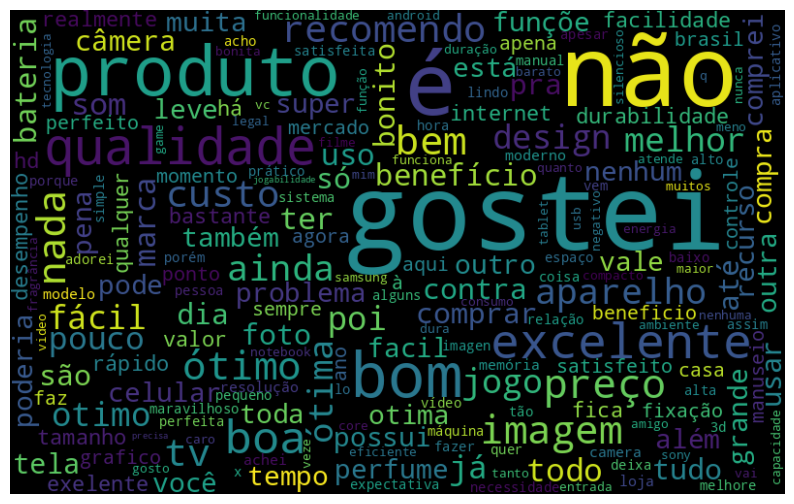

In [ ]:
generate_wordcloud(dataset.query("polarity_label == 'positive'"), "treat_stopword_punct_lower")

**Cross Validation and Naive Bayes**

In [ ]:
# Separação das classes e tweets
dados = dataset['review_text'].values
classes = dataset['polarity_label'].values

# Criar o pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer="word"),
    MultinomialNB()
)

# Definir o número de folds para a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Previsões com cross-validation
predicoes = cross_val_predict(pipeline, dados, classes, cv=kf, method='predict')

# Cálculo da matriz de confusão
matriz_confusao = metrics.confusion_matrix(classes, predicoes, labels=['positive', 'negative'])
print("Matriz de Confusão:\n", matriz_confusao)

# Criar DataFrame para análise dos erros
# Note que, com cross-validation, não temos uma divisão explícita entre treino e teste,
# então usaremos os dados completos para identificar os erros
df_erros = pd.DataFrame({'dados': dados, 'Classe Correta': classes, 'Classe Prevista': predicoes})

# Exibir exemplos de tweets mal classificados
erros = df_erros[df_erros['Classe Correta'] != df_erros['Classe Prevista']]
print("\nExemplos de Reviews de produtos Mal Classificados:")
print(erros)

# Contar o número total de erros
total_erros = erros.shape[0]
print(f"\nTotal de Reviews Mal Classificados: {total_erros}")

# Contar o número de erros por classe
erros_por_classe = erros.groupby('Classe Correta').size()


Matriz de Confusão:
 [[65212  1604]
 [ 2852  3958]]

Exemplos de Reviews de produtos Mal Classificados:
                                                   dados Classe Correta  \
6      positiva\n\nO que gostei: cumpriu com as espec...       positive   
39     tem uma boa aderencia te da mas agilidades no ...       negative   
43     Somente mais um jogo do estilo, nada realmente...       negative   
75     Olá a todos. Comprei o coffret que está na pro...       negative   
81     muito bom\n\nO que gostei: aquece e esfria mui...       positive   
...                                                  ...            ...   
73563  Os aparelhos Split Springer possuem design "cl...       positive   
73573  Produto bom, entretanto super valorizado\n\nO ...       negative   
73574  Demora demais nos ciclos,acumula sabão e não l...       positive   
73578  Ele e um celular funcional para quem deseja mu...       negative   
73591  Comprei este por ele ser mais acessivel (valor...       negative

### **Gráfico de erros por classe**

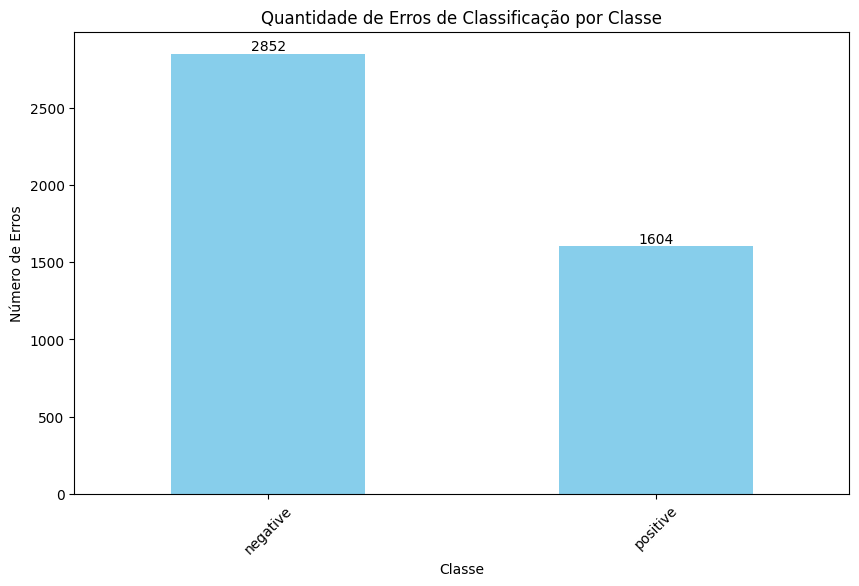

In [ ]:
# Plotar o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = erros_por_classe.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Erros de Classificação por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Erros')
plt.xticks(rotation=45)

# Adicionar rótulos aos dados das barras
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')

plt.show()

**Métricas de avaliação**

In [ ]:
# Calcula a acurácia
acuracia = metrics.accuracy_score(classes, predicoes)
print(f"\nAcurácia: {acuracia:.4f}")

# Calcula a precisão, recall e F1-score
precisao = metrics.precision_score(classes, predicoes, average='weighted')
recall = metrics.recall_score(classes, predicoes, average='weighted')
f1 = metrics.f1_score(classes, predicoes, average='weighted')

print(f"\nPrecisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Acurácia: 0.9395

Precisão: 0.9353
Recall: 0.9395
F1-Score: 0.9367


# **3. DataBase - Reviews de Filmes**

In [ ]:
dataset_Movies = '/content/drive/MyDrive/TwitterAnalytics/utlc_movies.csv'

In [ ]:
dataset = pd.read_csv(dataset_Movies, encoding='utf-8')

In [ ]:
# Ler o arquivo .csv
dataset = pd.read_csv(dataset_Movies, encoding='utf-8')
dataset.count()

,0
original_index,1487449
review_text,1487449
review_text_processed,1487449
review_text_tokenized,1487449
polarity,1189542
rating,1487449
kfold_polarity,1487449
kfold_rating,1487449


In [ ]:
dataset.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,214389,Um dos melhores desenhos!!,um dos melhores desenhos!!,"['um', 'dos', 'melhores', 'desenhos']",1.0,4,1,1
1,54616,O filme é realmente diferente e bem lento mas ...,o filme e realmente diferente e bem lento mas ...,"['filme', 'realmente', 'diferente', 'bem', 'le...",1.0,4,1,1
2,504263,"Hilário em alguns momentos, e muito bem feito.","hilario em alguns momentos, e muito bem feito.","['hilario', 'em', 'alguns', 'momentos', 'muito...",1.0,4,1,1
3,963792,choro toda vez que vejo :(,choro toda vez que vejo :(,"['choro', 'toda', 'vez', 'que', 'vejo']",1.0,5,1,1
4,1208949,Niiiice!,niiiice!,['niiiice'],1.0,4,1,1


## **1. Exploração dos Dados**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487449 entries, 0 to 1487448
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   original_index         1487449 non-null  int64  
 1   review_text            1487449 non-null  object 
 2   review_text_processed  1487449 non-null  object 
 3   review_text_tokenized  1487449 non-null  object 
 4   polarity               1189542 non-null  float64
 5   rating                 1487449 non-null  int64  
 6   kfold_polarity         1487449 non-null  int64  
 7   kfold_rating           1487449 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 90.8+ MB


In [ ]:
dataset.drop(
    columns = [
        "original_index",
        "review_text_processed",
        "review_text_tokenized",
        "kfold_polarity",
        "kfold_rating",
    ],
    inplace = True
)
dataset

,review_text,polarity,rating
0,Um dos melhores desenhos!!,1.0,4
1,O filme é realmente diferente e bem lento mas ...,1.0,4
2,"Hilário em alguns momentos, e muito bem feito.",1.0,4
3,choro toda vez que vejo :(,1.0,5
4,Niiiice!,1.0,4
...,...,...,...
1487444,Pelé dos Santos!,NaN,3
1487445,"Que história impactante, triste e forte. Chore...",1.0,5
1487446,Uma das produções que ficaram mais próximas da...,1.0,5
1487447,Adorei as referências à Breaking Bad!,1.0,5


Na base de dados de Reviews de Filmes, também há polaridades expressas como "NaN". Como não podemos assumir nenhuma definição nesses dados, iremos retira-los do dataset.

In [ ]:
dataset.dropna(inplace = True)
dataset["polarity_label"] = dataset["polarity"].map({0.0: 'negative', 1.0: 'positive'})
dataset

,review_text,polarity,rating,polarity_label
0,Um dos melhores desenhos!!,1.0,4,positive
1,O filme é realmente diferente e bem lento mas ...,1.0,4,positive
2,"Hilário em alguns momentos, e muito bem feito.",1.0,4,positive
3,choro toda vez que vejo :(,1.0,5,positive
4,Niiiice!,1.0,4,positive
...,...,...,...,...
1487443,Por que fazem essas traduções pebas dos título...,1.0,4,positive
1487445,"Que história impactante, triste e forte. Chore...",1.0,5,positive
1487446,Uma das produções que ficaram mais próximas da...,1.0,5,positive
1487447,Adorei as referências à Breaking Bad!,1.0,5,positive


**Contagem de avaliações positivas e negativas**

In [ ]:
Positive = dataset.query("polarity_label == 'positive'").shape[0]
print("Positivos: ", Positive)

Positivos:  1052003


In [ ]:
Negative = dataset.query("polarity_label == 'negative'").shape[0]
print("Negativos: ", Negative)

Negativos:  137539


## **Análise Exploratória**

In [ ]:
import seaborn as sns
import nltk
%matplotlib inline
from wordcloud import WordCloud

Definição de Stop Words a serem removidas

In [ ]:
import string
import nltk

# Certifique-se de que as stopwords do NLTK estão baixadas
nltk.download('stopwords')

# Lista fornecida de stopwords e pontuações
stopwords_puncts = [
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
    'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'ate', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles',
    'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'eramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos',
    'estao', 'estar', 'estas', 'estava', 'estavam', 'estavamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos',
    'estiver', 'estivera', 'estiveram', 'estiveramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivessemos', 'estou', 'eu', 'foi', 'fomos',
    'for', 'fora', 'foram', 'foramos', 'forem', 'formos', 'fosse', 'fossem', 'fossemos', 'fui', 'ha', 'haja', 'hajam', 'hajamos', 'hao', 'havemos', 'haver',
    'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houveramos', 'houverao', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam',
    'houveriamos', 'houvermos', 'houvesse', 'houvessem', 'houvessemos', 'isso', 'isto', 'ja', 'lhe', 'lhes', 'mais', 'mas', 'me', 'mesmo', 'meu', 'meus',
    'minha', 'minhas', 'muito', 'na', 'nao', 'nas', 'nem', 'no', 'nos', 'nossa', 'nossas', 'nosso', 'nossos', 'num', 'numa', 'o', 'os', 'ou', 'para',
    'pela', 'pelas', 'pelo', 'pelos', 'por', 'qual', 'quando', 'que', 'quem', 'sao', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'ser', 'sera', 'serao',
    'serei', 'seremos', 'seria', 'seriam', 'seriamos', 'seu', 'seus', 'so', 'somos', 'sou', 'sua', 'suas', 'tambem', 'te', 'tem', 'temos', 'tenha',
    'tenham', 'tenhamos', 'tenho', 'tera', 'terao', 'terei', 'teremos', 'teria', 'teriam', 'teriamos', 'teu', 'teus', 'teve', 'tinha', 'tinham',
    'tinhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tiveramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivessemos', 'tu', 'tua',
    'tuas', 'um', 'uma', 'voce', 'voces', 'vos', '{', '|', '}', '~'
]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords_accentuation_punctuation_lower(dataframe, text_column):
    word_punct_tokenizer = nltk.tokenize.WordPunctTokenizer()
    treated_text_data = []
    for review in dataframe[text_column]:
        tokenized_review = word_punct_tokenizer.tokenize(review)
        treated_review = []
        for word in tokenized_review:
            treated_word = unidecode.unidecode(word.lower())
            if treated_word not in stopwords_puncts:
                treated_review.append(treated_word)
        treated_text_data.append(' '.join(treated_review))
    dataset["review_text_2"] = treated_text_data

In [ ]:
remove_stopwords_punctuation_lower(dataset, "review_text")

### **Criação de uma nova coluna na base de dados com a StopWords removidas**

In [ ]:
dataset.head()

,review_text,polarity,rating,polarity_label,treat_stopword_punct_lower
0,Um dos melhores desenhos!!,1.0,4,positive,melhores desenhos !!
1,O filme é realmente diferente e bem lento mas ...,1.0,4,positive,filme é realmente diferente bem lento não form...
2,"Hilário em alguns momentos, e muito bem feito.",1.0,4,positive,hilário alguns momentos bem feito
3,choro toda vez que vejo :(,1.0,5,positive,choro toda vez vejo :(
4,Niiiice!,1.0,4,positive,niiiice


**Nuvem de Palavras (Word Cloud)**

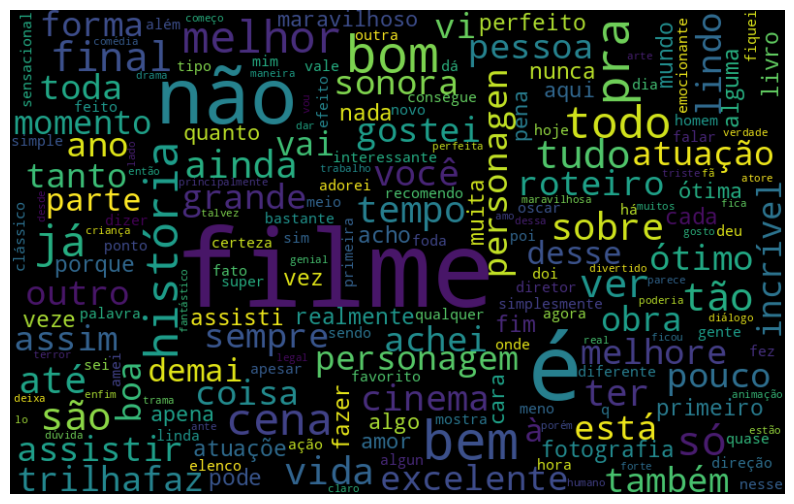

In [ ]:
generate_wordcloud(dataset.query("polarity_label == 'positive'"), "treat_stopword_punct_lower")

## **Modelagem com K-Folds e Naive Bayes**

In [ ]:
# Separação das classes e tweets
dados = dataset['review_text'].values
classes = dataset['polarity_label'].values

# Criar o pipeline
pipeline = make_pipeline(
    CountVectorizer(analyzer="word"),
    MultinomialNB()
)

# Definir o número de folds para a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Previsões com cross-validation
predicoes = cross_val_predict(pipeline, dados, classes, cv=kf, method='predict')

# Cálculo da matriz de confusão
matriz_confusao = metrics.confusion_matrix(classes, predicoes, labels=['positive', 'negative'])
print("Matriz de Confusão:\n", matriz_confusao)

# Criar DataFrame para análise dos erros
# Note que, com cross-validation, não temos uma divisão explícita entre treino e teste,
# então usaremos os dados completos para identificar os erros
df_erros = pd.DataFrame({'dados': dados, 'Classe Correta': classes, 'Classe Prevista': predicoes})

# Exibir exemplos de tweets mal classificados
erros = df_erros[df_erros['Classe Correta'] != df_erros['Classe Prevista']]
print("\nExemplos de Reviews de produtos Mal Classificados:")
print(erros)

# Contar o número total de erros
total_erros = erros.shape[0]
print(f"\nTotal de Reviews Mal Classificados: {total_erros}")

# Contar o número de erros por classe
erros_por_classe = erros.groupby('Classe Correta').size()


Matriz de Confusão:
 [[1011212   40791]
 [  65006   72533]]

Exemplos de Reviews de produtos Mal Classificados:
                                                     dados Classe Correta  \
8        Pode ter ótimos efeitos e blabla, mas n conseg...       negative   
13                        Enredo devagar quase parando ...       negative   
15                                                  lovely       negative   
27       Triste ver os comentários das pessoas menospre...       positive   
33       muito "ain, vou provar que sou loira, linda e ...       negative   
...                                                    ...            ...   
1189485                                            massa..       negative   
1189487  Eu devo ser muito burrinha mesmo pq eu não ach...       positive   
1189495  Bem, é um filme bem... como posso dizer... é u...       negative   
1189497  Tipico filme que coloca os EUA como os certos ...       positive   
1189500  O filme ate que e bem divertido 

### **Gráfico de erros por classe**

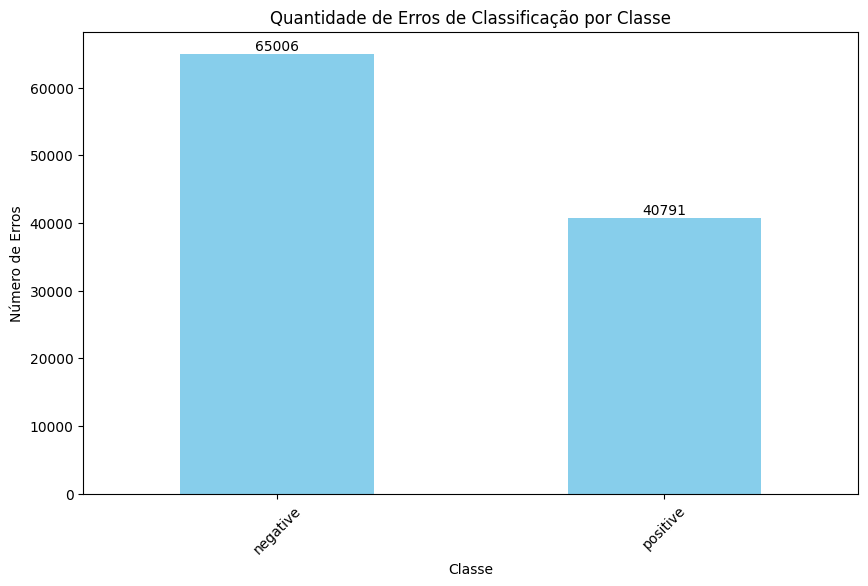

In [ ]:
# Plotar o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = erros_por_classe.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Erros de Classificação por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Erros')
plt.xticks(rotation=45)

# Adicionar rótulos aos dados das barras
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')

plt.show()

**Métricas de avaliação**

In [ ]:
# Calcula a acurácia
acuracia = metrics.accuracy_score(classes, predicoes)
print(f"\nAcurácia: {acuracia:.4f}")

# Calcula a precisão, recall e F1-score
precisao = metrics.precision_score(classes, predicoes, average='weighted')
recall = metrics.recall_score(classes, predicoes, average='weighted')
f1 = metrics.f1_score(classes, predicoes, average='weighted')

print(f"\nPrecisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Acurácia: 0.9111

Precisão: 0.9050
Recall: 0.9111
F1-Score: 0.9073
